# Concrete Slump Test - UCI

Analysis of the <a href="https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test">concrete slump test dataset from UCI.</a>

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('concrete_slump.csv')

In [3]:
data = data.drop('No', axis=1)

In [4]:
data.head()

,Cement,Slag,Fly_ash,Water,SP,Coarse_Aggr,Fine_Aggr,SLUMP,FLOW,Compressive_Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## Univariate Analysis

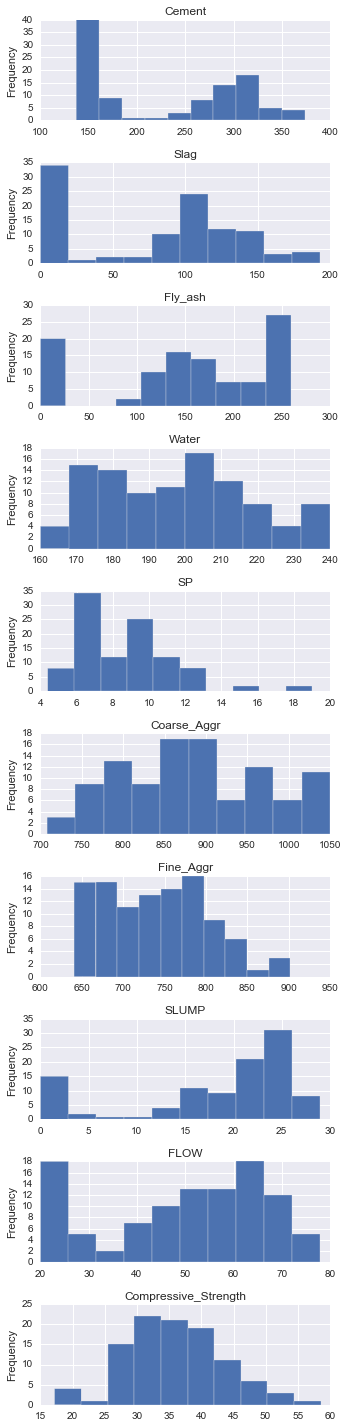

In [5]:
_, axes = pylab.subplots(len(data.columns), 1, figsize=(5, 20))

for i, fname in enumerate(data.columns):    
    data.loc[:, fname].plot(kind='hist', title=fname, ax=axes[i])
    
pylab.tight_layout()

## Correlation With the Target Columns

In [6]:
target_df = data.loc[:, data.columns[-3:]]

In [7]:
target_df.head()

,SLUMP,FLOW,Compressive_Strength
0,23.0,62.0,34.99
1,0.0,20.0,41.14
2,1.0,20.0,41.81
3,3.0,21.5,42.08
4,20.0,64.0,26.82


In [8]:
feature_df = data.loc[:, data.columns.difference(target_df.columns)]

In [9]:
feature_df.head()

,Cement,Coarse_Aggr,Fine_Aggr,Fly_ash,SP,Slag,Water
0,273.0,904.0,680.0,105.0,9.0,82.0,210.0
1,163.0,843.0,746.0,191.0,12.0,149.0,180.0
2,162.0,840.0,743.0,191.0,16.0,148.0,179.0
3,162.0,838.0,741.0,190.0,19.0,148.0,179.0
4,154.0,923.0,658.0,144.0,10.0,112.0,220.0


In [10]:
corrs = target_df.apply(lambda t: feature_df.corrwith(t))

In [11]:
corrs

,SLUMP,FLOW,Compressive_Strength
Cement,0.145913,0.186461,0.445725
Coarse_Aggr,-0.188157,-0.325787,-0.160684
Fine_Aggr,0.202272,0.190370,-0.154484
Fly_ash,-0.118621,-0.055423,0.444393
SP,-0.212902,-0.176314,-0.037871
Slag,-0.284037,-0.327231,-0.331588
Water,0.466568,0.632026,-0.254235


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002639E0FD898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002639E1C3E10>], dtype=object)

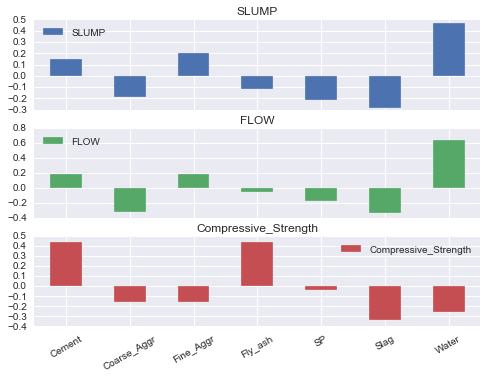

In [12]:
corrs.plot(kind='bar', subplots=True, rot='30')

## Correlation between Features

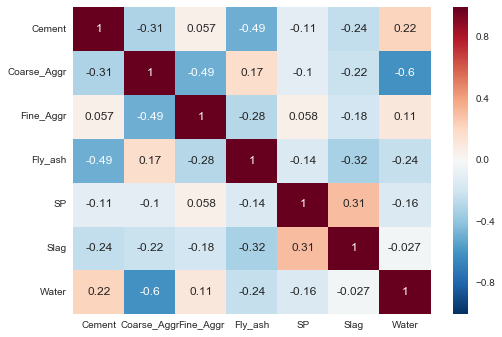

In [13]:
f_corrs = feature_df.corr()
sns.heatmap(f_corrs, annot=True)

## Bivariate Analysis

Scatterplot and regression for each {feature, target} pair.

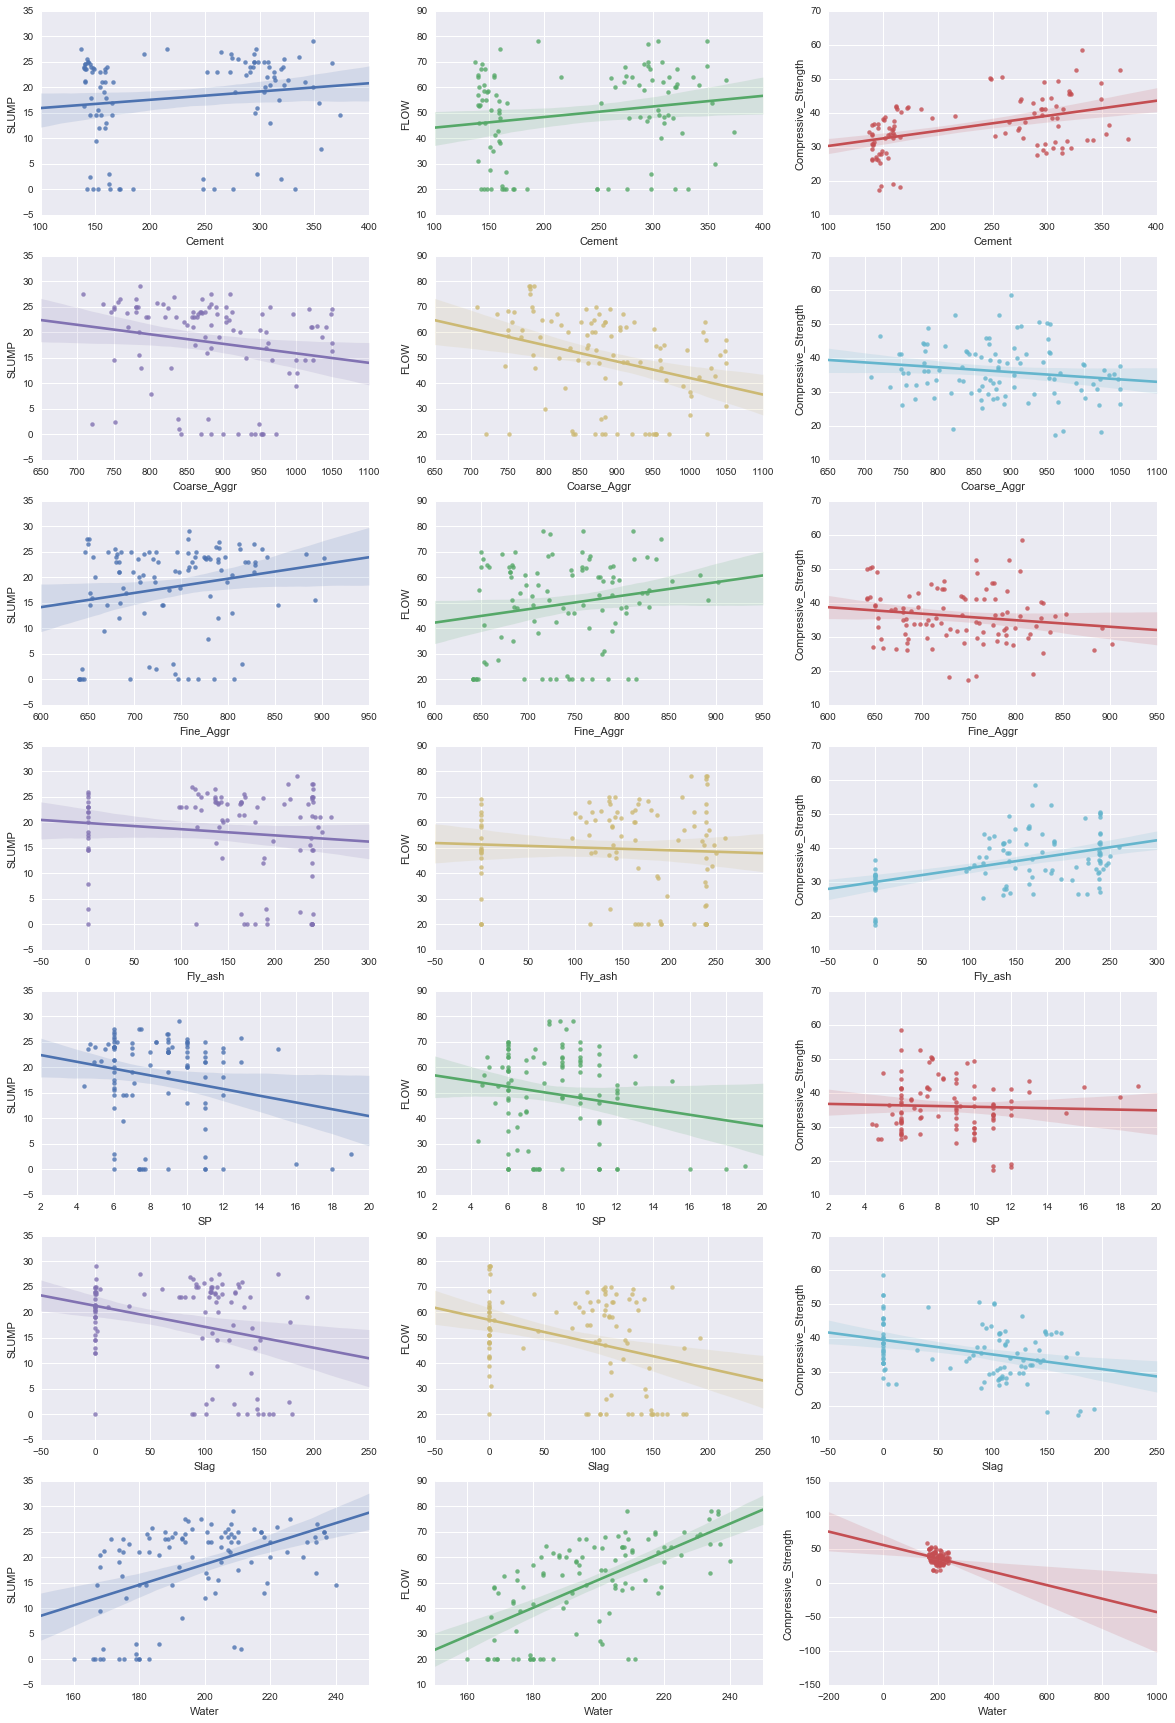

In [14]:
_, axes = pylab.subplots(len(feature_df.columns), len(target_df.columns), figsize=(20, 30))

for i, fname in enumerate(feature_df.columns):
    for j, tname in enumerate(target_df.columns):    
        sns.regplot(x=fname, y=tname, data=data, ax=axes[i][j])

## Apply Support Vector Regression

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
model = SVR(kernel='rbf', C=100, gamma=0.1)
preprocessor = StandardScaler()
estimator = make_pipeline(preprocessor, model)

scores = target_df.apply(lambda t: 
                pd.Series(data=cross_val_score(estimator=estimator, X=feature_df, y=t, cv=5), 
                         name=t.name))            

In [17]:
scores

,SLUMP,FLOW,Compressive_Strength
0,-0.453682,0.185968,0.838410
1,0.161689,0.277643,0.937307
2,-0.248470,-0.221615,0.970423
3,-0.386954,-0.301985,0.967432
4,0.180614,0.572732,0.931444


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002639DCD0780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002639D999748>], dtype=object)

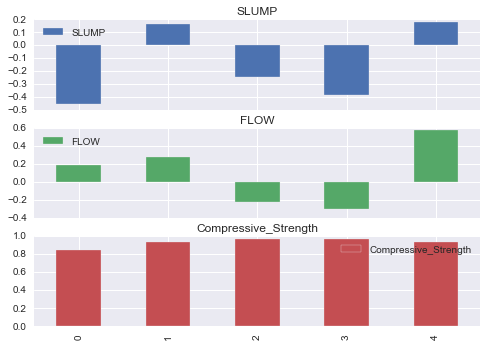

In [18]:
scores.plot(kind='bar', subplots=True)